## student name = Fatima Nawab
#**Real Estate Market Insights: AnExploratory Analysis of Zameen.com Listings in Pakistan**

##**Project Objective:**
To extract actionable insights from property listings on Zameen.com -such as pricing
trends, neighborhood comparisons, and listing quality -that can help real estate
investors make informed decision

Data Set URL="https://docs.google.com/spreadsheets/d/1jnt2UEGt-R2pKlUslVcdHwqwysrekoAZ/export?format=csv"

#Problem Statement
Zameen.com is one of Pakistan’s largest online real estate platforms. This dataset contains information about various property listings, including city, area, price, number of bedrooms, and more.

##Objective
The objective of this analysis is to explore the dataset and extract actionable insights that can help investors, buyers, and sellers understand the property market trends in Pakistan.

###The key business question is:

**“What factors drive property prices in Pakistan?”**

Through this analysis, we aim to:

*   Identify pricing trends across different cities and property types.
*   Detect outliers and inconsistencies in the listings.
*   Understand relationships between price, area, and number of rooms.
*   Provide data-driven recommendations for real estate investors.




In [ ]:
# import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
# for text processing and cleaning
!pip install langdetect
import re
from langdetect import detect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 19.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993223 sha256=817dc5797a019a71440e60e388fcda99c1165104790f760a4c8a497dda3ea4e7
  Stored in directory: /root/.cache/pip/wheels/c1/67/88/e844b5b022812e15a52e4eaa38a1e709e99f06f6639d7e3ba7
Successfully built langdetect


In [ ]:
# Fuzzy matching for data consistency
!pip install fuzzywuzzy
!pip install python-Levenshtein
from fuzzywuzzy import fuzz, process

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 53.2 MB/s eta 0:00:00


In [ ]:
# Outlier detection
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

In [ ]:
url = "https://docs.google.com/spreadsheets/d/1jnt2UEGt-R2pKlUslVcdHwqwysrekoAZ/export?format=csv"

In [ ]:
data = pd.read_csv(url)

In [ ]:
data.head(5)

,Title,URL,City,Type,Area,Price,Purpose,Location,Description,Built in year,...,Nearby Schools,Nearby Hospitals,Nearby Shopping Malls,Nearby Restaurants,Distance From Airport (kms),Nearby Public Transport Service,Other Nearby Places,Maintenance Staff,Security Staff,Other Facilities
0,Hmr Waterfront 2 Bed Room Premium Apartment On...,https://www.zameen.com/Property/dha_phase_8_hm...,Karachi,Flat,128 Sq. Yd.,PKR\n4.75 Crore,For Sale,"DHA Defence, Karachi, Sindh",SAIMA MARINA RESIDENCE HMR WATERFRONT\nINVESTO...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Chance Deal! Luxury 2 Bedroom Seafront Apartme...,https://www.zameen.com/Property/dha_defence_dh...,Karachi,Flat,161 Sq. Yd.,PKR\n6.25 Crore,For Sale,"DHA Defence, Karachi, Sindh",Live the Seafront Dream at H&S Residence \n2 B...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Luxury 1 Bed At H& S Residence By Japanese Arc...,https://www.zameen.com/Property/dha_phase_8_hm...,Karachi,Flat,111 Sq. Yd.,PKR\n3.45 Crore,For Sale,"DHA Defence, Karachi, Sindh",Live the Seafront Dream at H&S Residence \n1 B...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Luxury 1 Bed Seafront Apartment at HMR waterfr...,https://www.zameen.com/Property/dha_phase_8_hm...,Karachi,Flat,106 Sq. Yd.,PKR\n2.98 Crore,For Sale,"DHA Defence, Karachi, Sindh",Chance Deal at HMR Waterfront 1-Bed Apartment ...,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2 Bed Apartment For Booking On 3 Years | Saima...,https://www.zameen.com/Property/dha_phase_8_hm...,Karachi,Flat,156 Sq. Yd.,PKR\n4.65 Crore,For Sale,"DHA Defence, Karachi, Sindh",HMR WATERFRONT \n\nOwn Your Dream Apartment in...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18255 entries, 0 to 18254
Data columns (total 59 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Title                            18239 non-null  object 
 1   URL                              18255 non-null  object 
 2   City                             18255 non-null  object 
 3   Type                             18239 non-null  object 
 4   Area                             18239 non-null  object 
 5   Price                            18239 non-null  object 
 6   Purpose                          18239 non-null  object 
 7   Location                         18239 non-null  object 
 8   Description                      14893 non-null  object 
 9   Built in year                    11940 non-null  float64
 10  Parking Spaces                   9656 non-null   float64
 11  Double Glazed Windows            0 non-null      float64
 12  Central Air Condit

In [ ]:
data.shape

(18255, 59)

In [ ]:
data.describe()

,Built in year,Parking Spaces,Double Glazed Windows,Central Air Conditioning,Central Heating,Flooring,Electricity Backup,Waste Disposal,Floors,Other Main Features,...,Nearby Schools,Nearby Hospitals,Nearby Shopping Malls,Nearby Restaurants,Distance From Airport (kms),Nearby Public Transport Service,Other Nearby Places,Maintenance Staff,Security Staff,Other Facilities
count,11940.000000,9656.000000,0.0,0.0,0.0,0.0,0.0,0.0,8366.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,1967.123744,5.251833,NaN,NaN,NaN,NaN,NaN,NaN,2.393677,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1949.941225,41.917894,NaN,NaN,NaN,NaN,NaN,NaN,22.849369,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2020.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2024.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2025.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,202122.000000,2015.000000,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
 data.describe(include='all')

,Title,URL,City,Type,Area,Price,Purpose,Location,Description,Built in year,...,Nearby Schools,Nearby Hospitals,Nearby Shopping Malls,Nearby Restaurants,Distance From Airport (kms),Nearby Public Transport Service,Other Nearby Places,Maintenance Staff,Security Staff,Other Facilities
count,18239,18255,18255,18239,18239,18239,18239,18239,14893,11940.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
unique,16064,18255,84,7,468,1022,2,1051,13617,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,House For Sale,https://www.zameen.com/Property/dera_ghazi_kha...,Karachi,House,5 Marla,PKR\n60 Thousand,For Sale,"Bahria Town Rawalpindi, Rawalpindi, Punjab",Marriott Estate And Builders Offer a Ideal Hou...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,43,1,1250,13386,3528,269,11126,1884,33,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1967.123744,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1949.941225,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(data.dtypes)

Title                               object
URL                                 object
City                                object
Type                                object
Area                                object
Price                               object
Purpose                             object
Location                            object
Description                         object
Built in year                      float64
Parking Spaces                     float64
Double Glazed Windows              float64
Central Air Conditioning           float64
Central Heating                    float64
Flooring                           float64
Electricity Backup                 float64
Waste Disposal                     float64
Floors                             float64
Other Main Features                float64
Furnished                          float64
Bedrooms                            object
Bathrooms                           object
Servant Quarters                   float64
Drawing Roo

In [ ]:
print(data.isnull().sum())


Title                                 16
URL                                    0
City                                   0
Type                                  16
Area                                  16
Price                                 16
Purpose                               16
Location                              16
Description                         3362
Built in year                       6315
Parking Spaces                      8599
Double Glazed Windows              18255
Central Air Conditioning           18255
Central Heating                    18255
Flooring                           18255
Electricity Backup                 18255
Waste Disposal                     18255
Floors                              9889
Other Main Features                18255
Furnished                          18255
Bedrooms                              16
Bathrooms                             16
Servant Quarters                    8598
Drawing Room                       18255
Dining Room     

In [ ]:
print("\nNumber of duplicate rows:", data.duplicated().sum())


Number of duplicate rows: 0


In [ ]:
data['Price'].unique()[:20]


array(['PKR\n4.75 Crore', 'PKR\n6.25 Crore', 'PKR\n3.45 Crore',
       'PKR\n2.98 Crore', 'PKR\n4.65 Crore', 'PKR\n2.6 Crore',
       'PKR\n6.75 Crore', 'PKR\n1.68 Crore', 'PKR\n8 Crore',
       'PKR\n4.4 Crore', 'PKR\n5.2 Crore', 'PKR\n1.2 Crore',
       'PKR\n10.5 Crore', 'PKR\n4.5 Crore', 'PKR\n7.5 Crore',
       'PKR\n3.95 Crore', 'PKR\n5 Crore', 'PKR\n3.9 Crore',
       'PKR\n3.6 Crore', 'PKR\n3.4 Crore'], dtype=object)

In [ ]:
def convert_price(price):
    if isinstance(price, str):
        price = price.replace("PKR", "").replace("\n", "").strip()

        # Handle Crore (1 Crore = 10,000,000)
        if "Crore" in price:
            value = float(price.replace("Crore", "").strip())
            return value * 10000000

        # Handle Lakh (1 Lakh = 100,000)
        elif "Lakh" in price:
            value = float(price.replace("Lakh", "").strip())
            return value * 100000

        # Handle plain numbers
        else:
            try:
                return float(price.replace(",", ""))
            except:
                return None
    return None

# Apply function to your column
data['Price_Cleaned'] = data['Price'].apply(convert_price)

In [ ]:
# Check result
data[['Price', 'Price_Cleaned']].head(10)

,Price,Price_Cleaned
0,PKR\n4.75 Crore,47500000.0
1,PKR\n6.25 Crore,62500000.0
2,PKR\n3.45 Crore,34500000.0
3,PKR\n2.98 Crore,29800000.0
4,PKR\n4.65 Crore,46500000.0
5,PKR\n2.6 Crore,26000000.0
6,PKR\n6.75 Crore,67500000.0
7,PKR\n1.68 Crore,16800000.0
8,PKR\n8 Crore,80000000.0
9,PKR\n4.4 Crore,44000000.0


In [ ]:
data['Area'].unique()[:20]

array(['128 Sq. Yd.', '161 Sq. Yd.', '111 Sq. Yd.', '106 Sq. Yd.',
       '156 Sq. Yd.', '217 Sq. Yd.', '240 Sq. Yd.', '200 Sq. Yd.',
       '300 Sq. Yd.', '189 Sq. Yd.', '131 Sq. Yd.', '250 Sq. Yd.',
       '178 Sq. Yd.', '211 Sq. Yd.', '222 Sq. Yd.', '262 Sq. Yd.',
       '370 Sq. Yd.', '98 Sq. Yd.', '157 Sq. Yd.', '500 Sq. Yd.'],
      dtype=object)

In [ ]:
def convert_area(area):
    if isinstance(area, str):
        area = area.replace(',', '').strip()

        # Square Yards
        if 'Sq. Yd' in area:
            value = float(re.findall(r'[\d.]+', area)[0])
            return value * 9

        # Square Feet
        elif 'Sq. Ft' in area:
            value = float(re.findall(r'[\d.]+', area)[0])
            return value

        # Marla
        elif 'Marla' in area:
            value = float(re.findall(r'[\d.]+', area)[0])
            return value * 272.25

        # Kanal
        elif 'Kanal' in area:
            value = float(re.findall(r'[\d.]+', area)[0])
            return value * 5445

        else:
            # Just a number (if no unit mentioned)
            try:
                return float(re.findall(r'[\d.]+', area)[0])
            except:
                return None
    return None

# Apply the function
data['Area_SqFt'] = data['Area'].apply(convert_area)




In [ ]:
# check results
data[['Area', 'Area_SqFt']].head(10)

,Area,Area_SqFt
0,128 Sq. Yd.,1152.0
1,161 Sq. Yd.,1449.0
2,111 Sq. Yd.,999.0
3,106 Sq. Yd.,954.0
4,156 Sq. Yd.,1404.0
5,217 Sq. Yd.,1953.0
6,240 Sq. Yd.,2160.0
7,200 Sq. Yd.,1800.0
8,300 Sq. Yd.,2700.0
9,189 Sq. Yd.,1701.0


##handling missing values

In [ ]:
data = data.dropna(axis=1, how='all')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18255 entries, 0 to 18254
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Title             18239 non-null  object 
 1   URL               18255 non-null  object 
 2   City              18255 non-null  object 
 3   Type              18239 non-null  object 
 4   Area              18239 non-null  object 
 5   Price             18239 non-null  object 
 6   Purpose           18239 non-null  object 
 7   Location          18239 non-null  object 
 8   Description       14893 non-null  object 
 9   Built in year     11940 non-null  float64
 10  Parking Spaces    9656 non-null   float64
 11  Floors            8366 non-null   float64
 12  Bedrooms          18239 non-null  object 
 13  Bathrooms         18239 non-null  object 
 14  Servant Quarters  9657 non-null   float64
 15  Kitchens          13256 non-null  float64
 16  Store Rooms       9719 non-null   float6

In [ ]:
data = data.copy() # making sure we are editing the original data frame
# filling all other cols
data['Built in year'] = data['Built in year'].fillna(data['Built in year'].median())
data['Parking Spaces'] = data['Parking Spaces'].fillna(0)
data['Kitchens'] = data['Kitchens'].fillna(1)
data['Store Rooms'] = data['Store Rooms'].fillna(0)

# Fill text col
data['Description'] = data['Description'].fillna('No Description')

In [ ]:
data.isnull().sum()

,0
Title,16
URL,0
City,0
Type,16
Area,16
Price,16
Purpose,16
Location,16
Description,0
Built in year,0


In [ ]:
data.drop(columns=['Floors', 'Servant Quarters'], inplace=True)

In [ ]:
data.ffill(inplace=True)

In [ ]:
data['Price_Cleaned'] = data['Price_Cleaned'].fillna(data['Price_Cleaned'].median())

In [ ]:
data[['Bedrooms', 'Bathrooms']].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18255 entries, 0 to 18254
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Bedrooms   18255 non-null  object
 1   Bathrooms  18255 non-null  object
dtypes: object(2)
memory usage: 285.4+ KB


In [ ]:
data['Bedrooms'] = pd.to_numeric(data['Bedrooms'], errors='coerce')
data['Bathrooms'] = pd.to_numeric(data['Bathrooms'], errors='coerce')

In [ ]:
missing_percent = (data.isnull().sum() / len(data)) * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)
print(missing_percent)


Bathrooms    6.228431
Bedrooms     5.143796
dtype: float64


In [ ]:
# Fill missing values in Title and Type using mode
data['Title'] = data['Title'].fillna(data['Title'].mode()[0])
data['Type'] = data['Type'].fillna(data['Type'].mode()[0])

# Fill missing values in Location using forward fill (ffill)
data['Location'] = data['Location'].ffill()



In [ ]:
data.drop(['Price', 'Area'], axis=1, inplace=True)

In [ ]:
data['Bedrooms'] = data['Bedrooms'].fillna(data['Bedrooms'].mode()[0])
data['Bathrooms'] = data['Bathrooms'].fillna(data['Bathrooms'].mode()[0])


In [ ]:
data.isnull().sum()

,0
Title,0
URL,0
City,0
Type,0
Purpose,0
Location,0
Description,0
Built in year,0
Parking Spaces,0
Bedrooms,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18255 entries, 0 to 18254
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Title           18255 non-null  object 
 1   URL             18255 non-null  object 
 2   City            18255 non-null  object 
 3   Type            18255 non-null  object 
 4   Purpose         18255 non-null  object 
 5   Location        18255 non-null  object 
 6   Description     18255 non-null  object 
 7   Built in year   18255 non-null  float64
 8   Parking Spaces  18255 non-null  float64
 9   Bedrooms        18255 non-null  float64
 10  Bathrooms       18255 non-null  float64
 11  Kitchens        18255 non-null  float64
 12  Store Rooms     18255 non-null  float64
 13  Price_Cleaned   18255 non-null  float64
 14  Area_SqFt       18255 non-null  float64
dtypes: float64(8), object(7)
memory usage: 2.1+ MB


In [ ]:
data['City'].unique()



array(['Karachi', 'Islamabad', 'Faisalabad', 'Multan', 'Rawalpindi',
       'Peshawar', 'Jhelum', 'Murree', 'Hyderabad', 'Bahawalpur',
       'Sialkot', 'Abbottabad', 'Sahiwal', 'Lahore', 'Gujrat', 'Wah',
       'Sargodha', 'Sheikhupura', 'Chakwal', 'Naran', 'Nowshera',
       'Mardan', 'Chilas', 'Sarai Alamgir', 'Quetta', 'Rahim Yar Khan',
       'Okara', 'Attock', 'Dera Ghazi Khan', 'Taxila', 'Sukkur', 'Gwadar',
       'Kasur', 'Mirpur', 'Haripur', 'Gujar Khan', 'Gharo', 'Mirpur Khas',
       'Swat', 'Daska', 'Sadiqabad', 'Buner', 'Jhang', 'Lalamusa',
       'Lodhran', 'Pakpattan', 'Chiniot', 'Dera Ismail Khan',
       'Fateh Jang', 'Burewala', 'Hafizabad', 'Talagang', 'Vehari',
       'Jamshoro', 'Galyat', 'Gujranwala', 'Kharian', 'Karachi ',
       'Islamabad ', 'Faisalabad ', 'Multan ', 'Rawalpindi ',
       'Gujranwala ', 'Peshawar ', 'Lahore ', 'Jhelum ', 'Hyderabad ',
       'Sialkot  ', 'Murree ', 'Bahawalpur ', 'Abbottabad ', 'Wah ',
       'Gujrat ', 'Sahiwal ', 'Sheikhupura

In [ ]:
data['City'].value_counts()

,count
City,
Karachi,1250
Rawalpindi,1250
Karachi,1248
Rawalpindi,1248
Lahore,1248
...,...
Galyat,1
Sarai Alamgir,1
Nowshera,1


In [ ]:
standard_cities = ['Karachi', 'Islamabad', 'Faisalabad', 'Multan', 'Rawalpindi',
'Peshawar', 'Jhelum', 'Murree', 'Hyderabad', 'Bahawalpur',
'Sialkot', 'Abbottabad', 'Sahiwal', 'Lahore', 'Gujrat', 'Wah',
'Sargodha', 'Sheikhupura', 'Chakwal', 'Naran', 'Nowshera',
'Mardan', 'Chilas', 'Sarai Alamgir', 'Quetta', 'Rahim Yar Khan',
'Okara', 'Attock', 'Dera Ghazi Khan', 'Taxila', 'Sukkur', 'Gwadar',
'Kasur', 'Mirpur', 'Haripur', 'Gujar Khan', 'Gharo', 'Mirpur Khas',
'Swat', 'Daska', 'Sadiqabad', 'Buner', 'Jhang', 'Lalamusa',
'Lodhran', 'Pakpattan', 'Chiniot', 'Dera Ismail Khan',
'Fateh Jang', 'Burewala', 'Hafizabad', 'Talagang', 'Vehari',
'Jamshoro', 'Galyat', 'Gujranwala', 'Kharian']


In [ ]:
def standardize_city(city_name):
    match, score = process.extractOne(str(city_name), standard_cities)
    if score >= 80:
        return match
    else:
        return city_name


In [ ]:
data['City_Standardized'] = data['City'].apply(standardize_city)
print(data[['City', 'City_Standardized']].head(20))

       City City_Standardized
0   Karachi           Karachi
1   Karachi           Karachi
2   Karachi           Karachi
3   Karachi           Karachi
4   Karachi           Karachi
5   Karachi           Karachi
6   Karachi           Karachi
7   Karachi           Karachi
8   Karachi           Karachi
9   Karachi           Karachi
10  Karachi           Karachi
11  Karachi           Karachi
12  Karachi           Karachi
13  Karachi           Karachi
14  Karachi           Karachi
15  Karachi           Karachi
16  Karachi           Karachi
17  Karachi           Karachi
18  Karachi           Karachi
19  Karachi           Karachi


In [ ]:
data['City_Standardized'].value_counts()

,count
City_Standardized,
Karachi,2498
Rawalpindi,2498
Islamabad,2489
Lahore,2462
Multan,1623
Faisalabad,1610
Gujranwala,1576
Peshawar,1143
Sialkot,487


In [ ]:
data['Type'].unique()

array(['Flat', 'House', 'Upper Portion', 'Lower Portion', 'Penthouse',
       'Farm House', 'Room'], dtype=object)

##Remove outliers

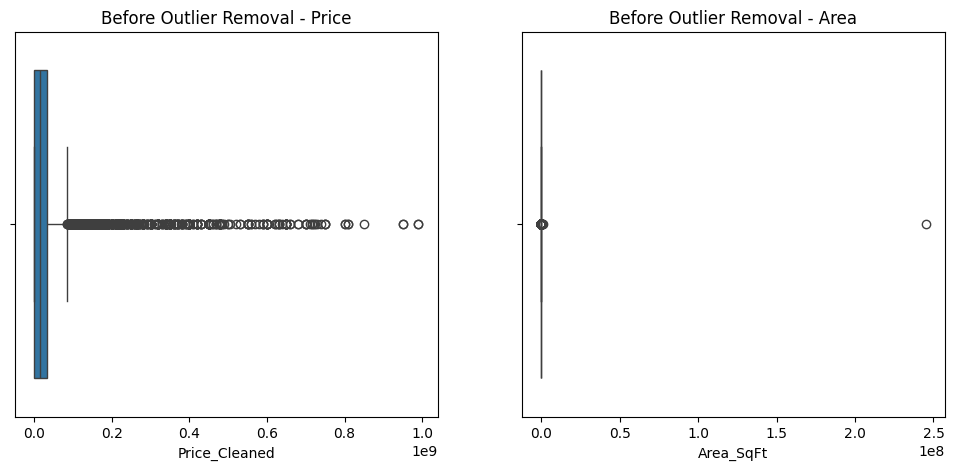

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(x=data['Price_Cleaned'])
plt.title("Before Outlier Removal - Price")

plt.subplot(1,2,2)
sns.boxplot(x=data['Area_SqFt'])
plt.title("Before Outlier Removal - Area")

plt.show()

In [ ]:
# Function to remove outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply on both columns
data_cleaned = remove_outliers(data, 'Price_Cleaned')
data_cleaned = remove_outliers(data_cleaned, 'Area_SqFt')


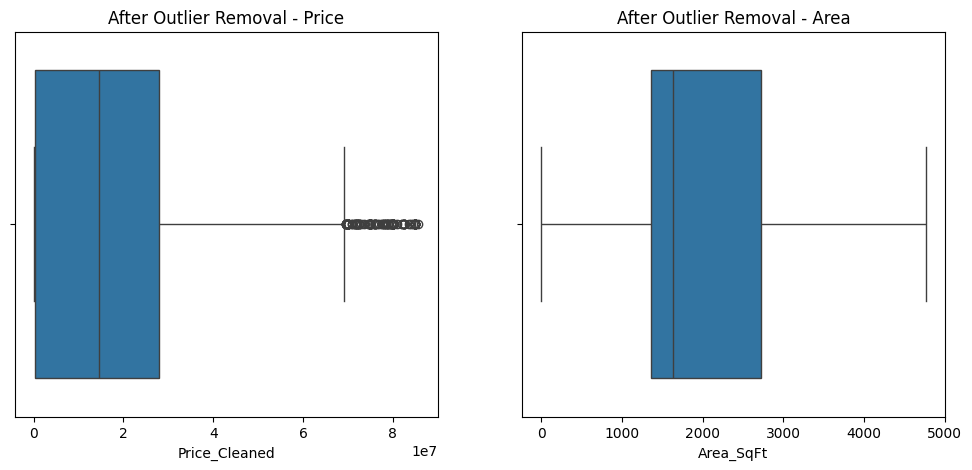

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(x=data_cleaned['Price_Cleaned'])
plt.title("After Outlier Removal - Price")

plt.subplot(1,2,2)
sns.boxplot(x=data_cleaned['Area_SqFt'])
plt.title("After Outlier Removal - Area")

plt.show()

##Feature Engineering
1. Price per Square Foot
2. Property Age
3. Price-to-Area Ratio Flag

In [ ]:
data_cleaned['Price_per_SqFt'] = data_cleaned['Price_Cleaned'] / data_cleaned['Area_SqFt']


In [ ]:
data_cleaned['High_Value_Property'] = data_cleaned['Price_per_SqFt'] > data_cleaned['Price_per_SqFt'].median()


###Cleaning built in year col

In [ ]:
data_cleaned['Built in year'].unique()


array([2.02400e+03, 2.00000e+00, 2.00800e+03, 2.02500e+03, 2.01500e+03,
       2.01300e+03, 1.50000e+01, 1.20000e+01, 2.00000e+01, 2.50000e+01,
       2.02200e+03, 2.02900e+03, 2.02800e+03, 2.01000e+03, 2.00000e+03,
       2.01400e+03, 2.02300e+03, 2.01100e+03, 2.01600e+03, 2.00500e+03,
       0.00000e+00, 2.01200e+03, 2.01800e+03, 2.02000e+03, 2.01900e+03,
       2.01700e+03, 2.00700e+03, 2.02100e+03, 2.02700e+03, 2.00600e+03,
       9.00000e+00, 1.99800e+03, 1.99000e+03, 1.00000e+00, 1.99700e+03,
       2.03000e+03, 2.02600e+03, 2.00200e+03, 1.99500e+03, 2.00900e+03,
       1.99200e+03, 7.86000e+02, 2.00100e+03, 2.02190e+04, 5.00000e+00,
       2.05000e+02, 6.00000e+00, 3.00000e+00, 2.05000e+03, 2.30000e+01,
       3.50000e+00, 4.00000e+00, 2.40000e+01, 1.00000e+01, 2.00400e+03,
       1.80000e+01, 1.10000e+01, 7.00000e+00, 1.99900e+03, 2.02420e+04,
       3.02500e+03, 2.05400e+03, 2.02000e+02, 1.98000e+03, 2.05200e+03,
       4.00000e+01, 1.40000e+01, 2.25000e+02, 2.19000e+02, 8.000

In [ ]:
data_cleaned['Built in year'] = pd.to_numeric(data_cleaned['Built in year'], errors='coerce')


In [ ]:
data_cleaned.loc[data_cleaned['Built in year'] < 1900, 'Built in year'] = (
    2025 - data_cleaned['Built in year'])


In [ ]:
data_cleaned.loc[(data_cleaned['Built in year'] > 2025) | (data_cleaned['Built in year'] < 1900), 'Built in year'] = None

In [ ]:
data_cleaned['Built in year'] = data_cleaned['Built in year'].fillna(data_cleaned['Built in year'].median())



In [ ]:
data_cleaned['Property_Age'] = 2025 - data_cleaned['Built in year']


In [ ]:
data_cleaned['Built in year'].unique()
data_cleaned[['Built in year', 'Property_Age']].head(10)

,Built in year,Property_Age
0,2024.0,1.0
1,2024.0,1.0
2,2024.0,1.0
3,2023.0,2.0
4,2024.0,1.0
5,2024.0,1.0
6,2008.0,17.0
7,2024.0,1.0
8,2025.0,0.0
9,2025.0,0.0


In [ ]:
data_cleaned[['City', 'Price_Cleaned', 'Area_SqFt', 'Price_per_SqFt', 'High_Value_Property','Property_Age']].sample(10)


,City,Price_Cleaned,Area_SqFt,Price_per_SqFt,High_Value_Property,Property_Age
13895,Faisalabad,150000.0,3267.00,45.913682,False,2.0
2104,Islamabad,40000000.0,2722.50,14692.378329,True,5.0
7157,Jhelum,25000000.0,1905.75,13118.194936,True,1.0
6465,Peshawar,43000000.0,2722.50,15794.306703,True,2.0
7177,Jhelum,2500000.0,544.50,4591.368228,False,1.0
4192,Multan,32500000.0,3267.00,9947.964493,False,1.0
7863,Sialkot,19500000.0,1361.25,14325.068871,True,1.0
14041,Multan,155000.0,1905.75,81.332809,False,0.0
7736,Sialkot,14500000.0,1089.00,13314.967860,True,1.0
11345,Karachi,200000.0,1800.00,111.111111,False,0.0


##Univariate Analysis
1. Distribution of Prices
2. Distribution of Area

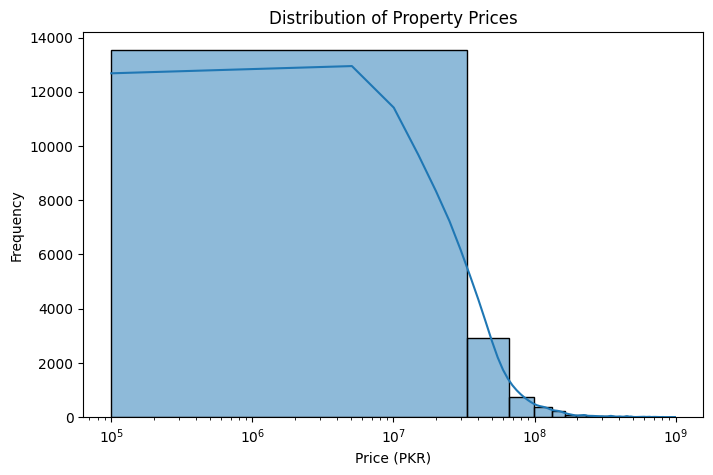

In [ ]:
#Univariate Analysis: Distribution of Prices ---
plt.figure(figsize=(8,5))
sns.histplot(data['Price_Cleaned'], kde=True, bins=30)
plt.title("Distribution of Property Prices")
plt.xscale("log")
plt.xlabel("Price (PKR)")
plt.ylabel("Frequency")
plt.show()

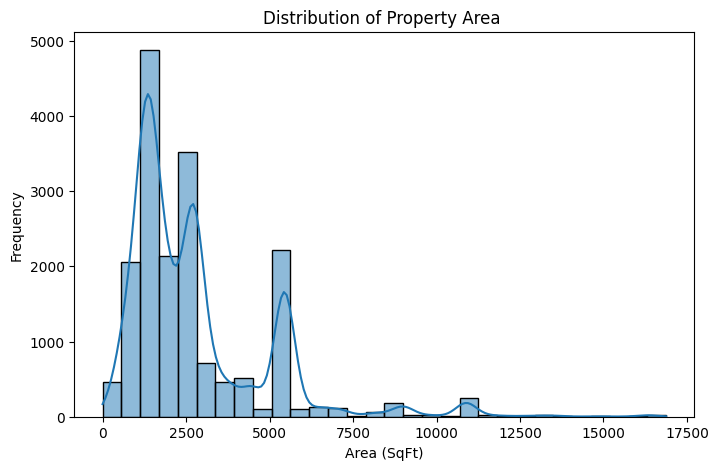

In [ ]:
#Univariate Analysis: Distribution of Area ---
plt.figure(figsize=(8,5))
filtered = data[data['Area_SqFt'] <= data['Area_SqFt'].quantile(0.99)]
sns.histplot(filtered['Area_SqFt'], kde=True, bins=30)
plt.title("Distribution of Property Area ")
plt.xlabel("Area (SqFt)")
plt.ylabel("Frequency")
plt.show()


##Bivariate Analysis

1. Correlation Heatmap

In [ ]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])


In [ ]:
correlation_matrix = numeric_data.corr()

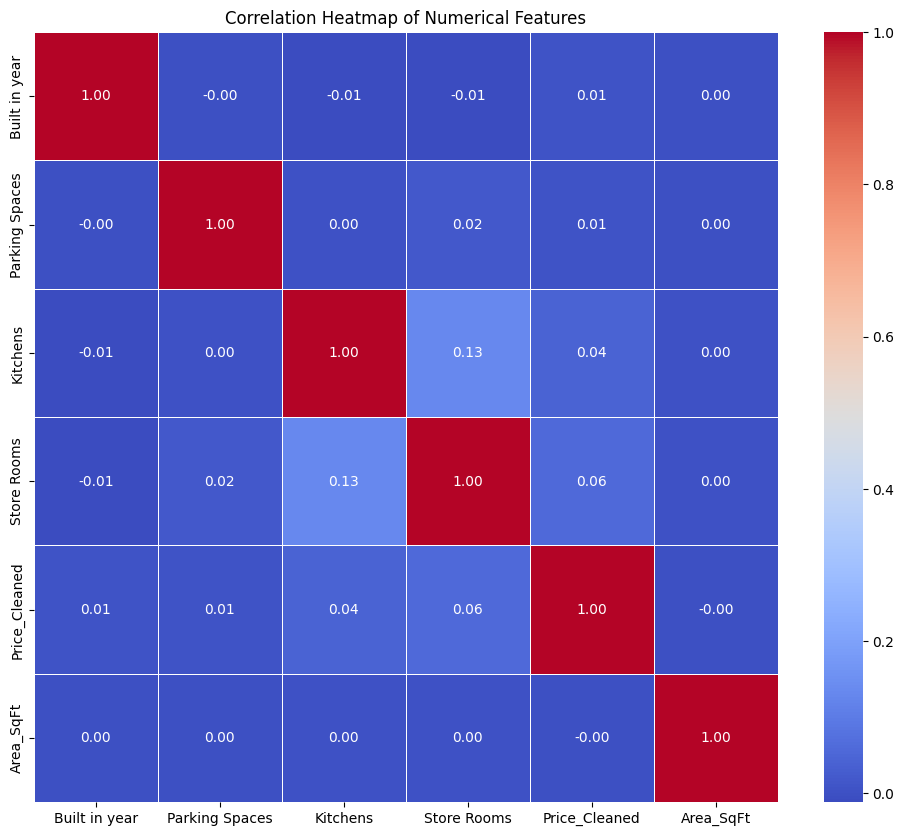

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

##Violin plots / box plots to compare prices by city, property type, bedrooms


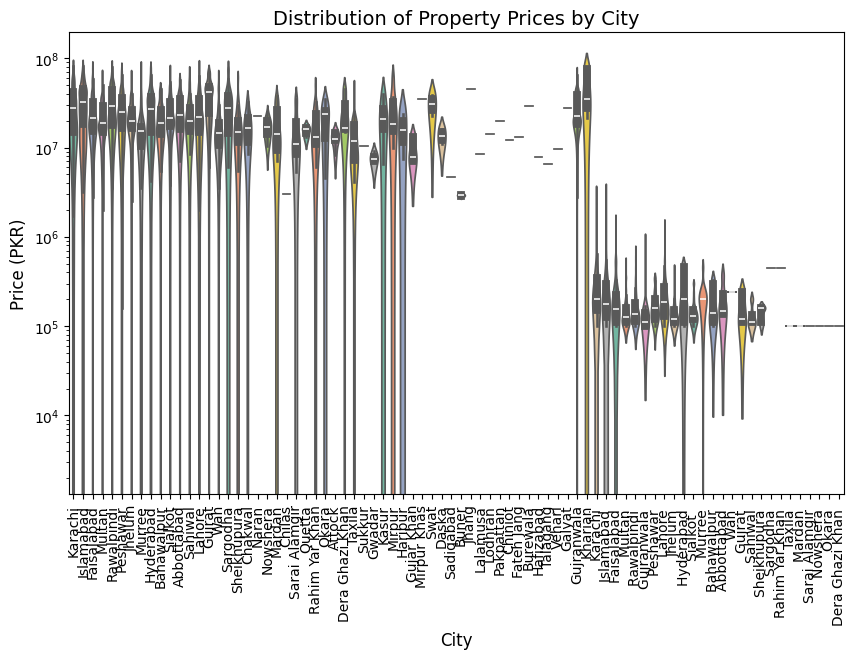

In [ ]:
#Violin Plot – Price by City
plt.figure(figsize=(10,6))
sns.violinplot(x='City', y='Price_Cleaned', hue='City', data=data_cleaned, palette='Set2', legend=False)
plt.xticks(rotation=90)
plt.title('Distribution of Property Prices by City', fontsize=14)
plt.xlabel('City', fontsize=12)
plt.ylabel('Price (PKR)', fontsize=12)
plt.yscale('log')
plt.show()



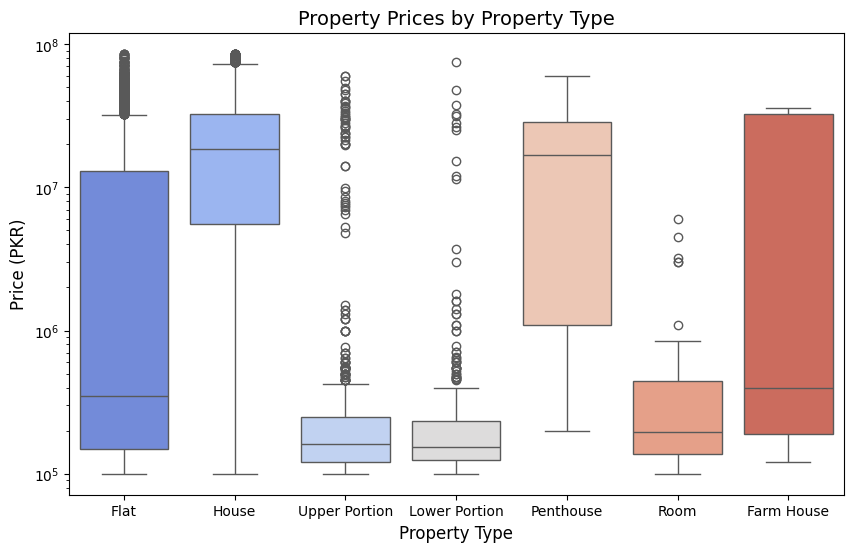

In [ ]:
#Box Plot – Price by Property Type
plt.figure(figsize=(10,6))
sns.boxplot(
    x='Type', y='Price_Cleaned',
    hue='Type',                 # same variable as x
    data=data_cleaned,
    palette='coolwarm',
    legend=False                # avoids duplicate legend
)
plt.title('Property Prices by Property Type', fontsize=14)
plt.xlabel('Property Type', fontsize=12)
plt.ylabel('Price (PKR)', fontsize=12)
plt.yscale('log')
plt.show()


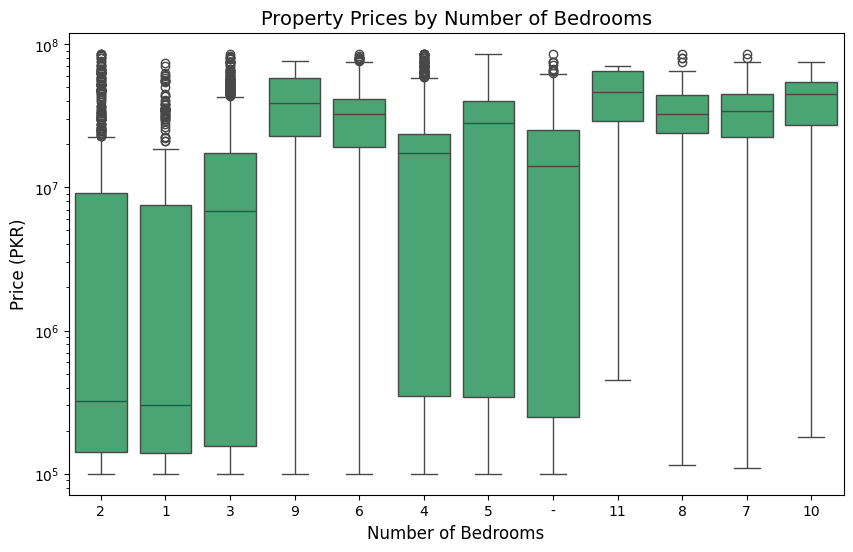

In [ ]:
#Box Plot – Price by Number of Bedrooms
plt.figure(figsize=(10,6))
sns.boxplot(
    x='Bedrooms',
    y='Price_Cleaned',
    data=data_cleaned,
    color='mediumseagreen'  # single color for all boxes
)
plt.title('Property Prices by Number of Bedrooms', fontsize=14)
plt.xlabel('Number of Bedrooms', fontsize=12)
plt.ylabel('Price (PKR)', fontsize=12)
plt.yscale('log')
plt.show()



##Insights & Recommendations
###Key Insights:

**Price Variations Across Cities:**

Karachi, Lahore, and Islamabad have the highest average property prices, while smaller cities and towns are more affordable.

Urban-rural disparities are significant, reflecting demand concentration in metropolitan areas.

**Correlation Between Area and Price:**

Larger properties generally command higher prices.

Price per square foot varies by city and property type, indicating that location and property features influence value more than size alone.

**Popular Property Types:**

Flats and houses dominate the market; luxury properties like penthouses and farmhouses are limited but priced significantly higher.

**Impact of Features:**

Properties with more bedrooms, bathrooms, and modern construction have higher market values.

Newly built properties are preferred, indicating a strong market preference for modern infrastructure.

**Data Standardization Importance:**

Cleaning and standardizing city names and other attributes highlighted inconsistencies in listings, showing the importance of preprocessing for accurate market analysis.


###Recommendations

**Investment Focus:**

Investors should prioritize major urban centers for high-value properties or niche luxury segments for higher returns.

Emerging cities or mid-range properties offer opportunities for affordable investments with long-term growth potential.

**Property Development Strategy**:

Developers should focus on modern, well-equipped properties with multiple bedrooms and bathrooms to meet buyer preferences.

Introducing value-added amenities can help differentiate properties in competitive urban markets.

**Pricing Strategy:**

Use price per square foot analysis to determine competitive pricing based on location, property type, and features.

Adjust pricing dynamically according to market demand and property age.

**Data-driven Decision Making:**

Real estate platforms and investors should ensure accurate, standardized listings to support better market insights and reduce buyer confusion.

Continuous monitoring of trends and data cleaning will help identify investment opportunities and market gaps